In [19]:
from brian2 import *

In [20]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

Generator spikes:
[0 1 2 3 4]
[10. 20. 30. 40. 50.] ms
Relay spikes:
[]
[] s
Output Spikes:
[1]
[33.] ms


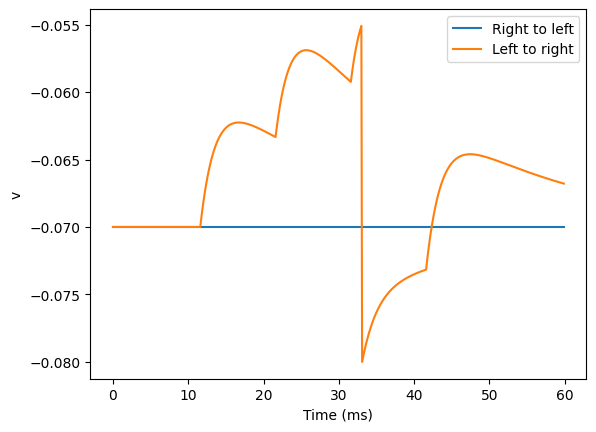

In [24]:
start_scope() 
#spikeArr = [4,3,2,1,0] #Right to left
spikeArr = [0,1,2,3,4] #Left to right
generator = SpikeGeneratorGroup(5, spikeArr, [10,20,30,40,50]*ms)
generatorMonitor = SpikeMonitor(generator)

tau = 20*ms
tau_syn = 2*ms
I_weight = 3*nA
threshold='v > -55*mV'
v_reset='v = -80*mV'
v_rest = -70*mV
R = 100*Mohm
equ = '''
dv/dt = -(v - v_rest)/tau + R*I_syn/tau : volt
dI_syn/dt = -I_syn/tau_syn : ampere
'''

relay = NeuronGroup(4, equ, threshold=threshold, reset=v_reset, method=exact)
relay.v = -70*mV
inpToRel = Synapses(generator, relay, on_pre='I_syn += I_weight')
inpToRel.connect(condition='j+1 == i')
#visualise_connectivity(inpToRel)

relay1 = NeuronGroup(4, equ, threshold=threshold, reset=v_reset, method=exact)
relay1.v = -70*mV
inpToRel1 = Synapses(generator, relay1, on_pre='I_syn += I_weight')
inpToRel1.connect(condition='j == i')
#visualise_connectivity(inpToRel1)

inhib = NeuronGroup(5, equ, threshold=threshold, reset=v_reset, method=exact)
inhib.v = -70*mV
inpToIn = Synapses(generator, inhib, on_pre='I_syn += I_weight')
inpToIn.connect(condition='j == i')
#visualise_connectivity(inpToIn)

inToRelay = Synapses(inhib, relay, on_pre='I_syn -= I_weight')
inToRelay.connect(condition='j == i')
# visualise_connectivity(inToRelay)

inToRelay1 = Synapses(inhib, relay1, on_pre='I_syn -= I_weight')
inToRelay1.connect(condition='j+1 == i')
# visualise_connectivity(inToRelay1)

output = NeuronGroup(2, equ, threshold=threshold, reset=v_reset, method=exact)
output.v = -70*mV
relayToOut = Synapses(relay, output, on_pre='I_syn += I_weight/3')
relayToOut.connect(condition='j == 0')
#visualise_connectivity(relayToOut)

relay1ToOut = Synapses(relay1, output, on_pre='I_syn += I_weight/3')
relay1ToOut.connect(condition='j == 1')
#visualise_connectivity(relay1ToOut)

relayMonitor = SpikeMonitor(relay)
relayState = StateMonitor(relay, 'v', record=True)
inhibState = StateMonitor(inhib, 'v', record=True)
outputMonitor = SpikeMonitor(output)
outputState = StateMonitor(output, 'v', record=True)

run(60*ms)
print("Generator spikes:")
print(generatorMonitor.i[:])
print(generatorMonitor.t[:])
print("Relay spikes:")
print(relayMonitor.i[:])
print(relayMonitor.t[:])
print("Output Spikes:")
print(outputMonitor.i[:])
print(outputMonitor.t[:])

plot(outputState.t/ms, outputState.v[0], label='Right to left')
plot(outputState.t/ms, outputState.v[1], label='Left to right')
xlabel('Time (ms)')
ylabel('v')
legend()

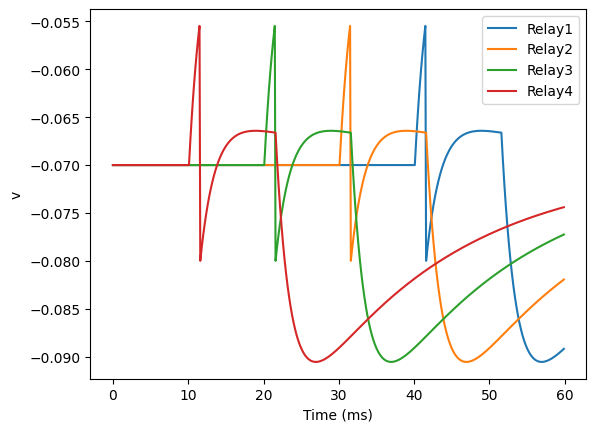

In [22]:
plot(relayState.t/ms, relayState.v[0], label='Relay1')
plot(relayState.t/ms, relayState.v[1], label='Relay2')
plot(relayState.t/ms, relayState.v[2], label='Relay3')
plot(relayState.t/ms, relayState.v[3], label='Relay4')
xlabel('Time (ms)')
ylabel('v')
legend()

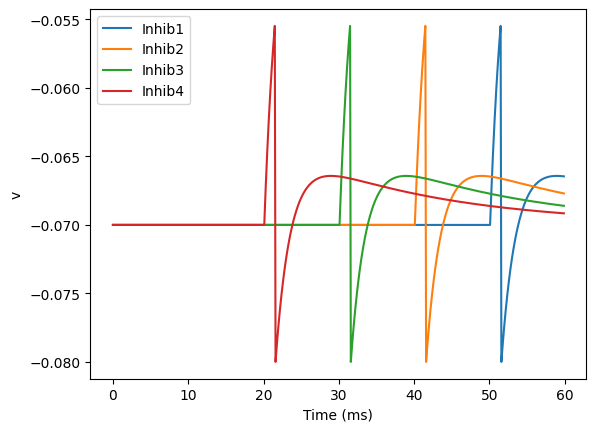

In [23]:
plot(inhibState.t/ms, inhibState.v[0], label='Inhib1')
plot(inhibState.t/ms, inhibState.v[1], label='Inhib2')
plot(inhibState.t/ms, inhibState.v[2], label='Inhib3')
plot(inhibState.t/ms, inhibState.v[3], label='Inhib4')
xlabel('Time (ms)')
ylabel('v')
legend()